In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
	def colored_scatter(x, y, c=None):
		def scatter(*args, **kwargs):
			args = (x, y)
			if c is not None:
				kwargs['c'] = c
			kwargs['alpha'] = scatter_alpha
			plt.scatter(*args, **kwargs)
		return scatter

	g = sns.JointGrid(x=col_x, y=col_y, data=df)
	color = None
	legends = []

	for name, df_group in df.groupby(col_k):
		legends.append(name)
		if k_is_color:
			color=name
		g.plot_joint(colored_scatter(df_group[col_x],df_group[col_y],color))
		sns.distplot(df_group[col_x].values, ax=g.ax_marg_x, color=color)
		sns.distplot(df_group[col_y].values, ax=g.ax_marg_y, color=color, vertical=True)
		# Do also global Hist:
		sns.distplot(df[col_x].values, ax=g.ax_marg_x, color='grey')
		sns.distplot(df[col_y].values.ravel(), ax=g.ax_marg_y, color='grey', vertical=True)
		plt.legend(legends)

In [3]:
n = 1000
m1 = -3
m2 = 3
df1 = pd.DataFrame((np.random.randn(n) + m1).reshape(-1, 2), columns=['x', 'y'])
df2 = pd.DataFrame((np.random.randn(n) + m2).reshape(-1, 2), columns=['x', 'y'])
df3 = pd.DataFrame(df1.values + df2.values, columns=['x', 'y'])
df1['kind'] = 'dist1'
df2['kind'] = 'dist2'
df3['kind'] = 'dist1+dist2'
df = pd.concat([df1,df2,df3])

/Volumes/SSD-PSMU3/GitHub/my_env/miniforge3/envs/mf-keiba/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Volumes/SSD-PSMU3/GitHub/my_env/miniforge3/envs/mf-keiba/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Volumes/SSD-PSMU3/GitHub/my_env/miniforge3/envs/mf-keiba/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future v

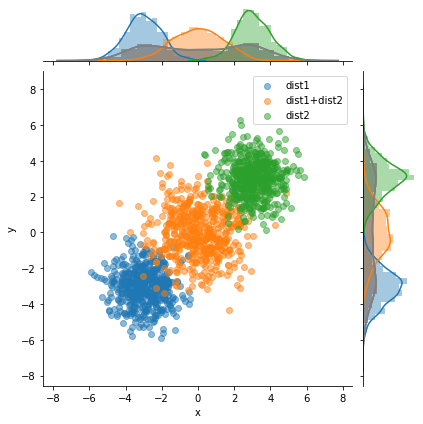

In [4]:
multivariateGrid('x', 'y', 'kind', df=df)